# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [163]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [164]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [165]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [166]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [167]:
import sklearn.model_selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define the features (X) and the target (y)
X = data.drop(columns=['MEDV'])  # All columns except the target
y = data['MEDV']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Display the sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [168]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Generate predictions on both the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [169]:
from sklearn.metrics import r2_score

# Calculate R-squared for the training and testing set
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training R-squared: {r2_train}')
print(f'Testing R-squared: {r2_test}')

Training R-squared: 0.748128373817436
Testing R-squared: 0.6975994758544026


## 4. Calculate and print mean squared error for both the training and the testing set.

In [170]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for the training and testing set
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Training MSE: {mse_train}')
print(f'Testing MSE: {mse_test}')

Training MSE: 21.68559696332844
Testing MSE: 23.48530946792632


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [171]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Squared Error for the training and testing set
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'Training MAE: {mae_train}')
print(f'Testing MAE: {mae_test}')

Training MAE: 3.325338975048326
Testing MAE: 3.1787299336542216


## Classification Model Evaluation

In [200]:
from sklearn.datasets import load_iris
data = load_iris()

In [173]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [201]:
column_names = data.feature_names
column_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [175]:
df = pd.DataFrame(data['data'],columns=column_names)

In [176]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [189]:
target = pd.DataFrame(data.target)
target

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [178]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [179]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [203]:
X = df # Independent variables (features)
y = target # Dependent variable (class)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Display the sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [206]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test) 

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [211]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy on the test set: {train_accuracy:.2f}")
print(f"Test accuracy on the test set: {test_accuracy:.2f}")

Train accuracy on the test set: 0.97
Test accuracy on the test set: 1.00


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [212]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_train = balanced_accuracy_score(y_train, y_train_pred)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)

print(f"Balanced Accuracy on the training set: {balanced_accuracy_train:.2f}")
print(f"Balanced Accuracy on the test set: {balanced_accuracy_test:.2f}")

Balanced Accuracy on the training set: 0.97
Balanced Accuracy on the test set: 1.00


## 10. Calculate and print the precision score for both the training and the testing set.

In [213]:
from sklearn.metrics import precision_score

precision_train = precision_score(y_train, y_train_pred, average='weighted')
precision_test = precision_score(y_test, y_test_pred, average='weighted')

print(f"Precision on the training set: {precision_train:.2f}")
print(f"Precision on the test set: {precision_test:.2f}")

Precision on the training set: 0.98
Precision on the test set: 1.00


## 11. Calculate and print the recall score for both the training and the testing set.

In [216]:
from sklearn.metrics import recall_score

recall_train = recall_score(y_train, y_train_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')

print(f"Recall on the training set: {recall_train:.2f}")
print(f"Recall on the test set: {recall_test:.2f}")

Recall on the training set: 0.97
Recall on the test set: 1.00


## 12. Calculate and print the F1 score for both the training and the testing set.

In [215]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print(f"F1 Score on the training set: {f1_train:.2f}")
print(f"F1 Score on the test set: {f1_test:.2f}")

F1 Score on the training set: 0.97
F1 Score on the test set: 1.00


## 13. Generate confusion matrices for both the training and the testing set.

In [214]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print(f"Confusion Matrix for Training Set:\n{cm_train}")
print(f"Confusion Matrix for Test Set:\n{cm_test}")

Confusion Matrix for Training Set:
[[39  0  0]
 [ 0 37  3]
 [ 0  0 41]]
Confusion Matrix for Test Set:
[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


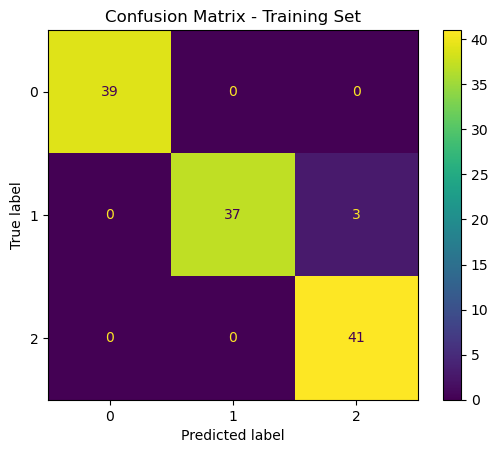

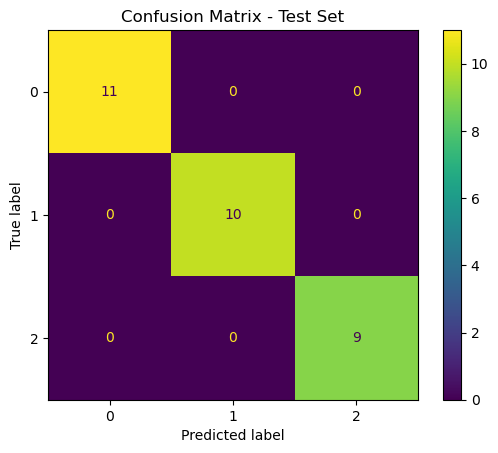

In [218]:
# Visualize confusion matrix for the training set
ConfusionMatrixDisplay(confusion_matrix=cm_train).plot()
plt.title('Confusion Matrix - Training Set')
plt.show()

# Visualize confusion matrix for the test set
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()
plt.title('Confusion Matrix - Test Set')
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [252]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [258]:
# KNN regressor Housing

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

X_house = housing.drop(columns=['MEDV'])
y_house = housing['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X_house, y_house, test_size=0.2)

model_house = KNeighborsRegressor()

model_house.fit(X_train, y_train)

y_house_pred_train = model_house.predict(X_train)
y_house_pred_test = model_house.predict(X_test)

r2_house = r2_score(y_test, y_house_pred_test)
r2_house

0.5034364052067102

In [257]:
# KNN classifier Iris

iris = load_iris()

column_names = iris.feature_names

iris_df = pd.DataFrame(iris['data'],columns=column_names)
iris_target = pd.DataFrame(iris.target)

X_iris = iris_df
y_iris = iris_target

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2)

model_iris = KNeighborsClassifier()

model_iris.fit(X_train, y_train)

y_iris_pred_train = model_iris.predict(X_train)
y_iris_pred_test = model_iris.predict(X_test)

accuracy_iris = accuracy_score(y_test, y_iris_pred_test)
accuracy_iris

0.9333333333333333